In [2]:
import sounddevice as sd
import time
import matplotlib.pyplot as plt
from pylab import *
#Parameters--------------
fs = 48*10**3 #48k
duration = 10  # seconds

In [3]:
#open all recordings
import glob
fns = glob.glob("*.npy")
sigs = []
ys = []
for fn in fns:
    sigs.append( np.load(fn) )
    ys.append(fn.split('_')[3])

(0, 5000)

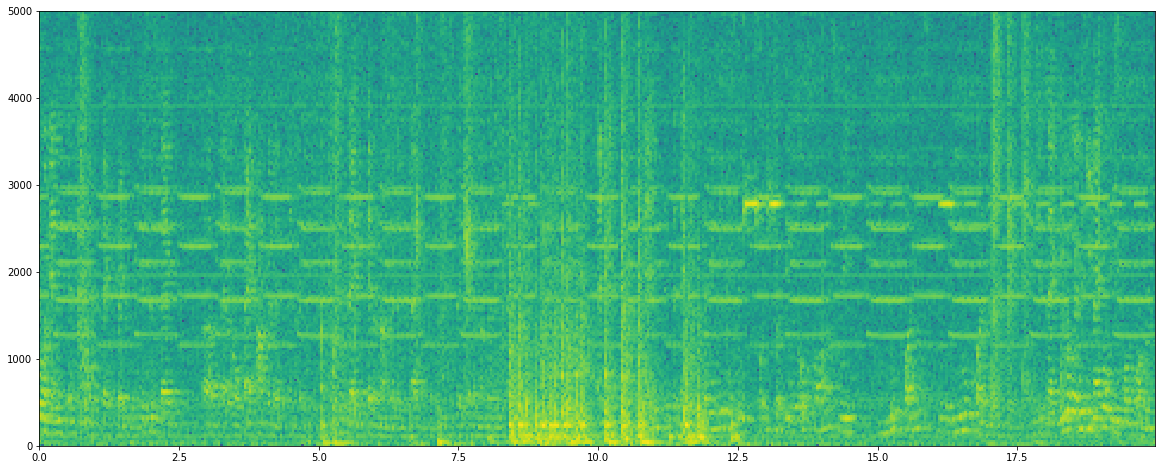

In [290]:
sig = sigs[1]
plt.figure(figsize=(20,8))
spectrum, freqs, t, im = specgram(sig.flatten(),Fs=fs,NFFT=2**11,scale='dB',noverlap=0)
plt.ylim(0, 5000)

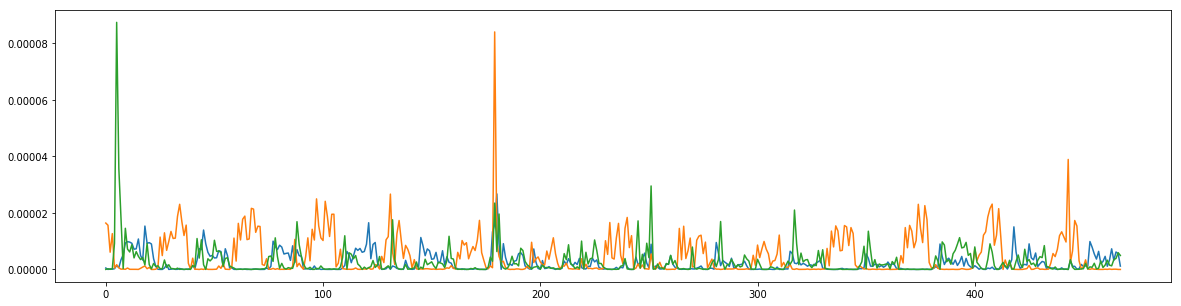

In [67]:
plt.figure(figsize=(20,5))
intrIdx = [90,98,108]
for idx in intrIdx:
    plt.plot(spectrum[idx,:])

1


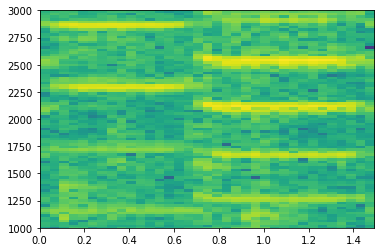

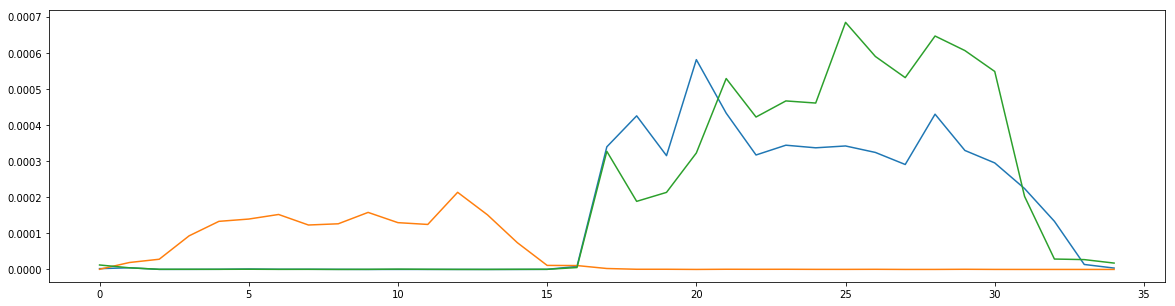

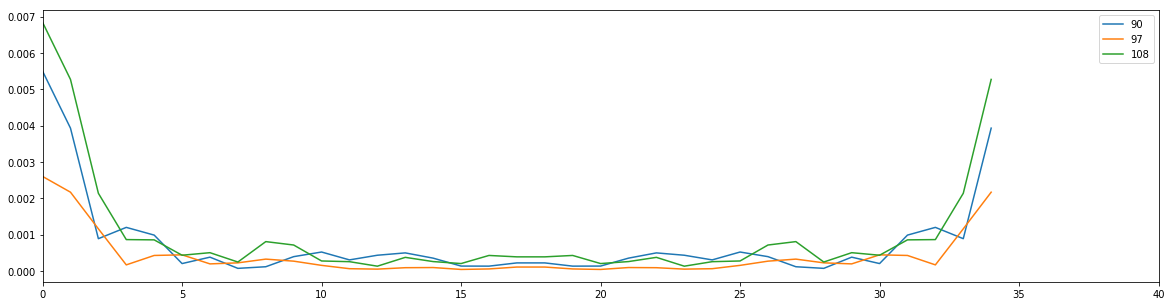

In [129]:
n=6
sig = sigs[n]
offs=1.6
sig = sig[int(offs*fs):int((offs+1.5)*fs)]
print(ys[n])
spectrum, freqs, t, im = specgram(sig.flatten(),Fs=fs,NFFT=2**11,scale='dB',noverlap=0)
plt.ylim((1000,3000))

plt.figure(figsize=(20,5))
intrIdx = [90,98,108]
for idx in intrIdx:
    plt.plot(spectrum[idx,:])

plt.figure(figsize=(20,5))
intrIdx = [90,97,108]
al = []
for idx in intrIdx:
    ff = np.fft.fft(spectrum[idx,:])
    plt.plot(np.abs(ff)) 
    al.append(ff[14])
plt.xlim((0,40))
plt.legend(intrIdx)
#print(al.sum)

1


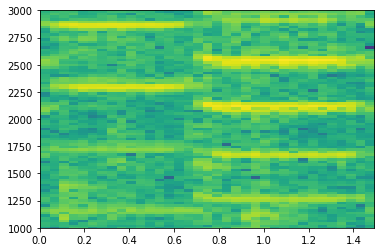

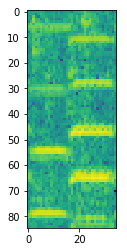

In [146]:
n=6
sig = sigs[n]
offs=1.6
stepsize = 1.5
sig = sig[int(offs*fs):int((offs)*fs)]
print(ys[n])
spectrum, freqs, t, im = specgram(sig.flatten(),Fs=fs,NFFT=2**11,scale='dB',noverlap=0)
plt.ylim((1000,3000))
fidx = (freqs>1000)*(freqs<3000)
freqs[fidx]
plt.figure()
plt.imshow(np.log(spectrum[fidx,:]))

27 13


(0.3036972163173749, False, '1')

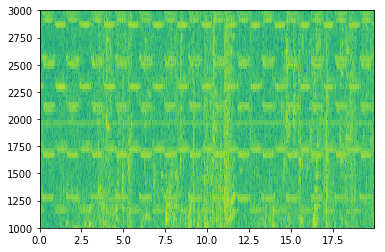

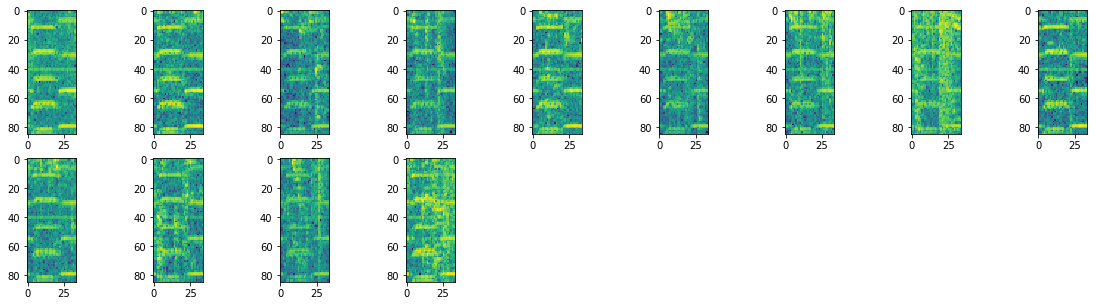

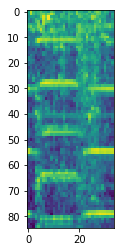

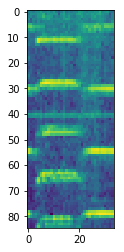

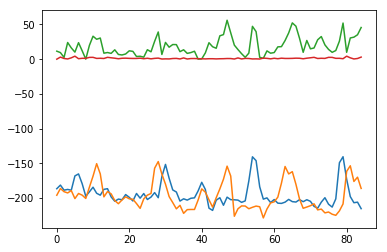

In [13]:
nn=2
sig = sigs[nn]
spectrum, freqs, t, im = specgram(sig.flatten(),Fs=fs,NFFT=2**11,scale='dB',noverlap=0)
plt.ylim((1000,3000))

a=[]
plt.figure(figsize=(20,5))
stepsize = 1.45
offs = 0
freqidx = (freqs>1000)*(freqs<3000)
for n, step in enumerate(np.arange(offs,max(t)-max(t)%stepsize,stepsize)):
    tidx = (t>step) * (t<(step+stepsize))
    plt.subplot(2,9,n+1)
    a.append(spectrum[freqidx][:,tidx])
    plt.imshow(np.log(a[n]))
    
plt.figure()
plt.imshow(np.log(np.asarray(a).sum(axis=0)))
plt.figure()
plt.imshow(np.log(np.asarray(a).prod(axis=0)))
intr = np.log(np.asarray(a).prod(axis=0))

plt.figure()
iix = intr[54].argmax()
plt.plot(intr[:,iix])
print(iix, (iix+20)%intr.shape[1])

plt.plot(intr[:,(iix+20)%intr.shape[1]])
diff = np.abs( intr[:,1] - intr[:,20] )
plt.plot( diff)

difft = np.abs(np.fft.fft(diff-diff.mean()))
difft/=len(difft)
plt.plot(difft)
difft[3],difft[3]>8, ys[nn]

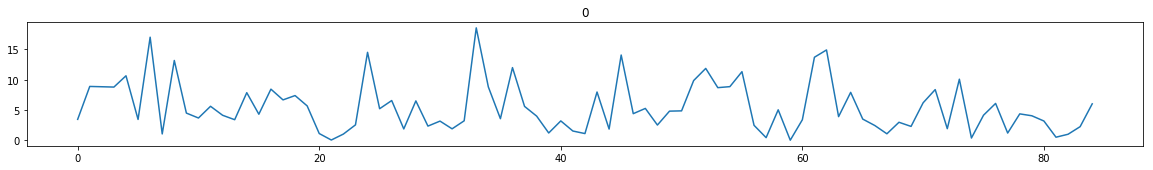

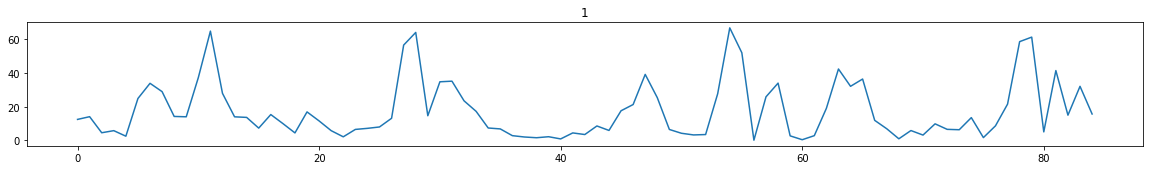

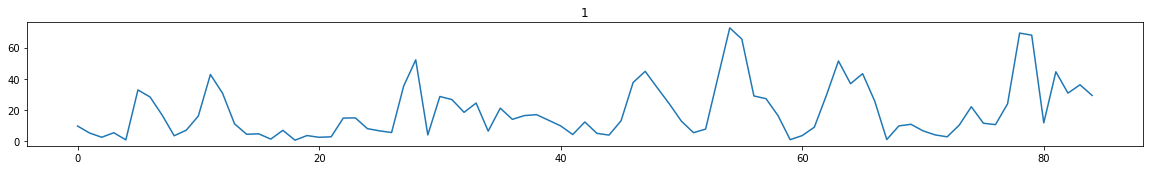

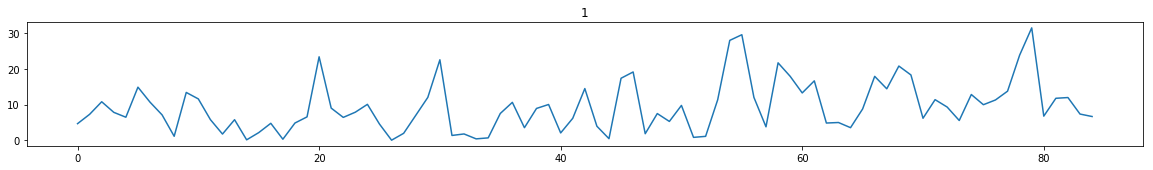

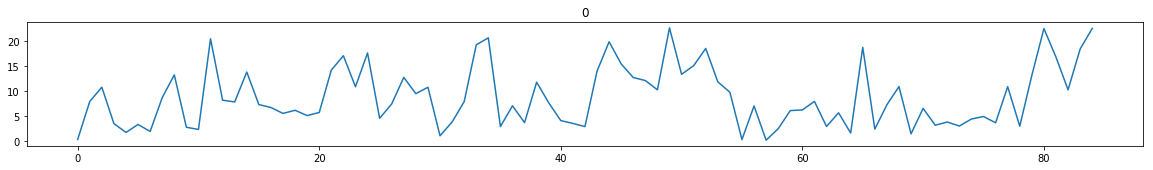

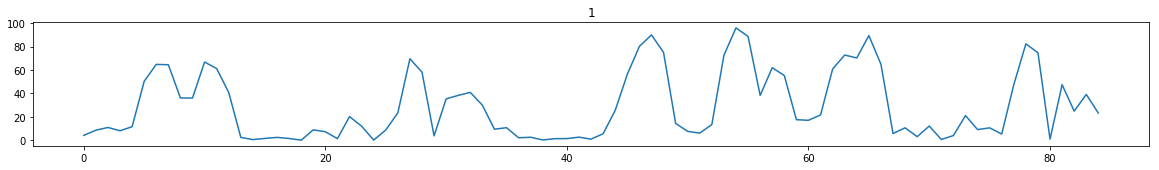

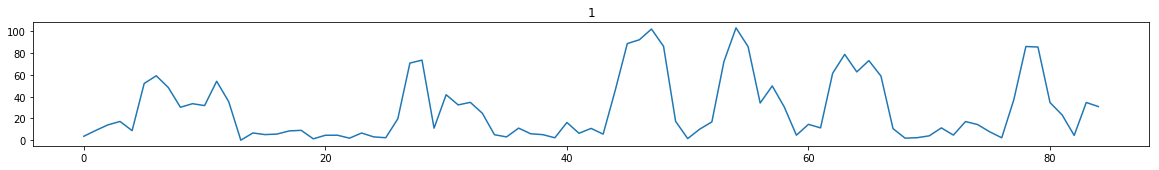

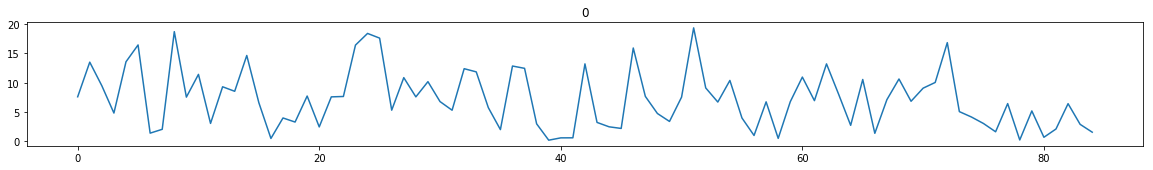

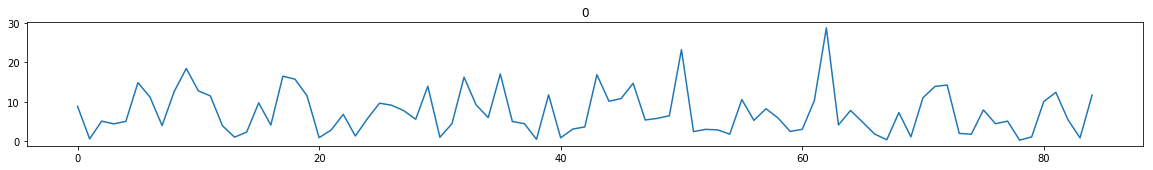

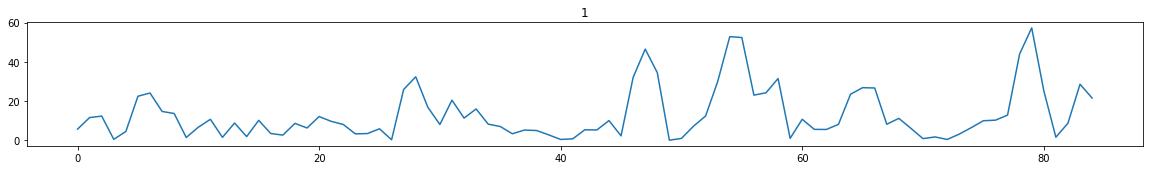

In [38]:
for nn in range(10):
    plt.figure(figsize=(20,5))
    sig = sigs[nn]
    plt.subplot(1,2,1)
    spectrum, freqs, t, im = specgram(sig.flatten(),Fs=fs,NFFT=2**11,scale='dB',noverlap=0)
    plt.ylim((1000,3000))

    a=[]
    stepsize = 1.45
    offs = 0
    freqidx = (freqs>1000)*(freqs<3000)
    for n, step in enumerate(np.arange(offs,max(t)-max(t)%stepsize,stepsize)):
        tidx = (t>step) * (t<(step+stepsize))
        a.append(spectrum[freqidx][:,tidx])

    intr = np.log(np.asarray(a).prod(axis=0))
    iix = intr[54].argmax()
    
    plt.subplot(2,1,2)
    plt.title(ys[nn])
    
    #plt.plot(intr[:,(iix)%intr.shape[1]])
    #plt.plot(intr[:,(iix+20)%intr.shape[1]])
    
    diff = np.abs( intr[:,iix] - intr[:,(iix+20)%intr.shape[1]] )
    plt.plot( diff)

    difft = np.abs(np.fft.fft(diff-diff.mean()))
    difft/=len(difft)
    #plt.plot(difft)
    #plt.ylim(-10,30)
    #difft[3],difft[3]>8, ys[nn]

In [157]:
t.shape, spectrum.shape

((468,), (1025, 468))

In [12]:
f = np.fft.fft2(np.log(spectrum))

<IPython.core.display.Javascript object>


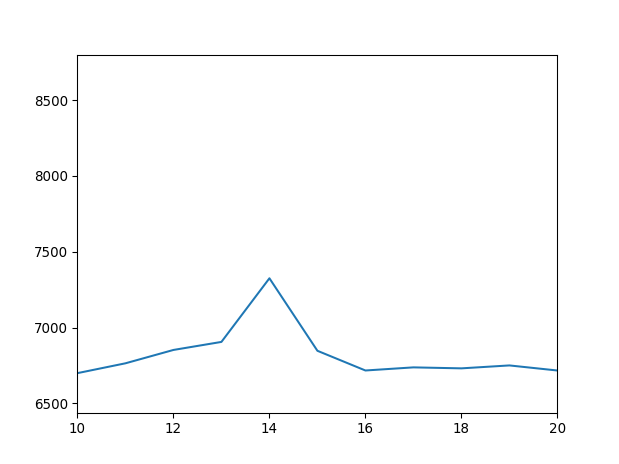

In [108]:
plt.figure()
plt.plot(np.log(np.abs(f)).sum(axis=0))
plt.xlim((10,20))
plt.show()

In [7]:

sd.play(myrecording, fs)

<IPython.core.display.Javascript object>


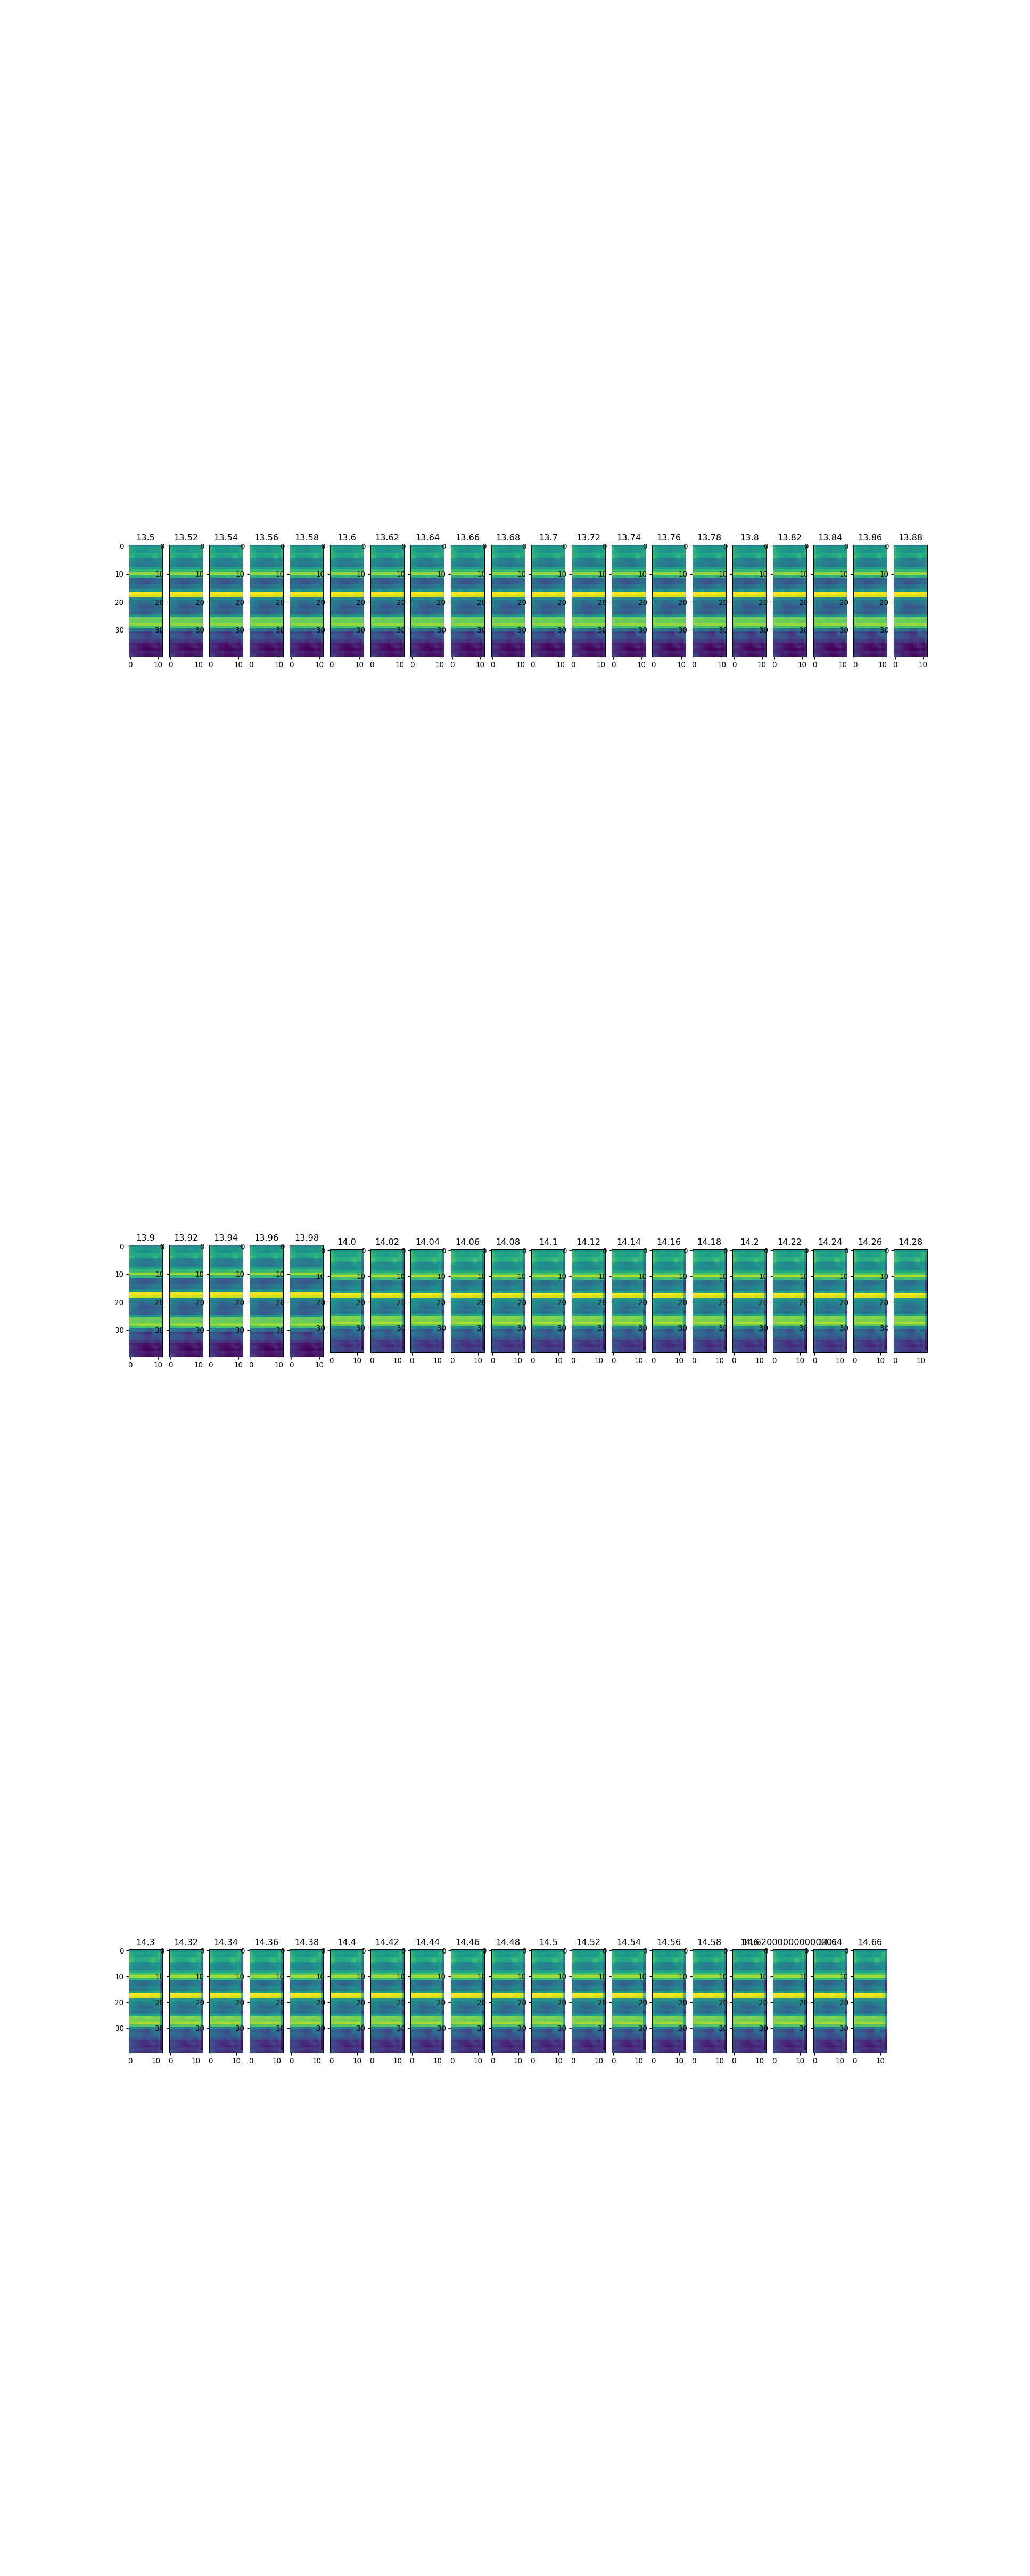

In [168]:
h = spectrum.shape[0]
b = spectrum.shape[1]
offset=130
plt.figure(figsize=(20,50))

for j in range(59):
    stepsize = 13.5+0.02*j
    acu = spectrum[:,offset + 0:offset+int(stepsize-1)]
    for i in range(1, 10): #(b//stepsize)
        acu += spectrum[:,offset + int(i*stepsize):offset+int((i*stepsize)+int(stepsize-1))]

    plt.subplot(3,20,j+1)
    plt.imshow(np.log(acu[80:120,:]))
    plt.title(str(stepsize))

In [139]:
int(np.floor(12.2))

12

In [101]:
stepsize = 14
for i in range(1,10):
    print(b//stepsize)

33
33
33
33
33
33
33
33
33
